In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [44]:
df = pd.read_csv('fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [46]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
label_features = ['telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education','industry','function','fraudulent']

In [50]:
for i in label_features:
     x=df[i].value_counts()
     print(x.to_frame())

   telecommuting
0          17113
1            767
   has_company_logo
1             14220
0              3660
   has_questions
0           9088
1           8792
           employment_type
Full-time            11620
Contract              1524
Part-time              797
Temporary              241
Other                  227
                  required_experience
Mid-Senior level                 3809
Entry level                      2697
Associate                        2297
Not Applicable                   1116
Director                          389
Internship                        381
Executive                         141
                                   required_education
Bachelor's Degree                                5145
High School or equivalent                        2080
Unspecified                                      1397
Master's Degree                                   416
Associate Degree                                  274
Certification                                   

(array([5.00000e-01, 2.01500e+02, 4.02500e+02, 6.03500e+02, 8.04500e+02,
        1.00550e+03, 1.20650e+03, 1.40750e+03, 1.60850e+03, 1.80950e+03,
        2.01050e+03, 2.21150e+03, 2.41250e+03, 2.61350e+03, 2.81450e+03,
        3.01550e+03, 3.21650e+03, 3.41750e+03, 3.61850e+03, 3.81950e+03,
        4.02050e+03, 4.22150e+03, 4.42250e+03, 4.62350e+03, 4.82450e+03,
        5.02550e+03, 5.22650e+03, 5.42750e+03, 5.62850e+03, 5.82950e+03,
        6.03050e+03, 6.23150e+03, 6.43250e+03, 6.63350e+03, 6.83450e+03,
        7.03550e+03, 7.23650e+03, 7.43750e+03, 7.63850e+03, 7.83950e+03,
        8.04050e+03, 8.24150e+03, 8.44250e+03, 8.64350e+03, 8.84450e+03,
        9.04550e+03, 9.24650e+03, 9.44750e+03, 9.64850e+03, 9.84950e+03,
        1.00505e+04, 1.02515e+04, 1.04525e+04, 1.06535e+04, 1.08545e+04,
        1.10555e+04, 1.12565e+04, 1.14575e+04, 1.16585e+04, 1.18595e+04,
        1.20605e+04, 1.22615e+04, 1.24625e+04, 1.26635e+04, 1.28645e+04,
        1.30655e+04, 1.32665e+04, 1.34675e+04, 1.36

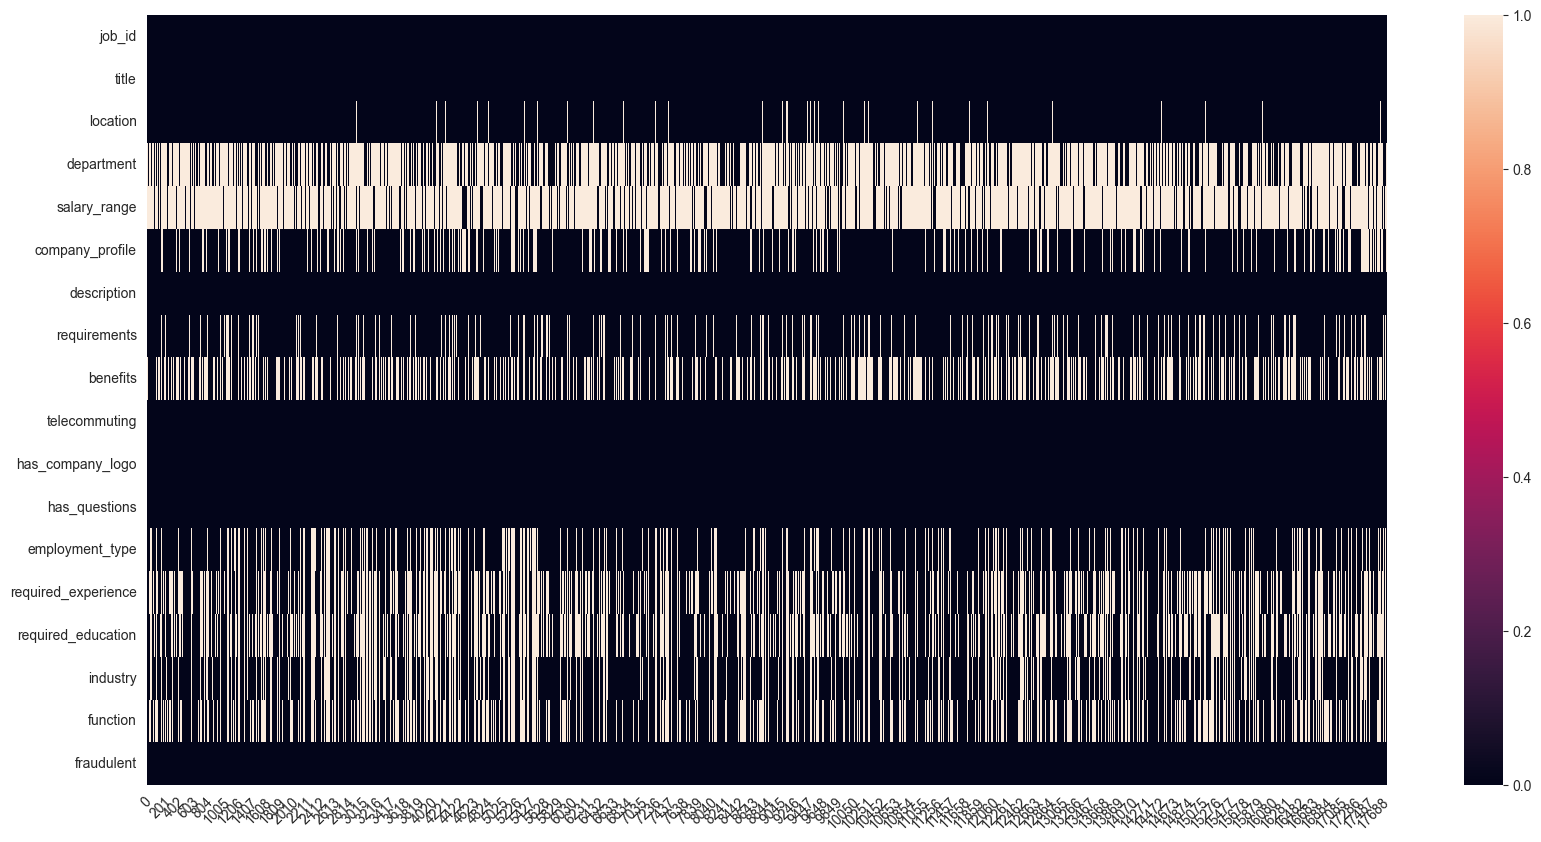

In [51]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna().transpose())
plt.xticks(rotation=45)

In [52]:
df['function'].fillna(df['department'],inplace=True)
df.drop(columns=['job_id','salary_range','department'],inplace=True)

In [55]:
x=df['function'].value_counts()
x.to_frame()

,function
Information Technology,1766
Sales,1531
Engineering,1371
Customer Service,1239
Marketing,868
...,...
Holiday Inn & Suites,1
Transport,1
BIOMEDICAL EQUIPMENT TECHNICAN,1
Sales Department,1


In [53]:
text_features=['title','benefits','company_profile','location','description','requirements','fraudulent']

categorical_features=['employment_type','required_experience','required_education','industry','function','telecommuting','has_company_logo','has_questions','fraudulent']

In [56]:
cat_col=df[categorical_features].fillna('None')
cat_col

,employment_type,required_experience,required_education,industry,function,telecommuting,has_company_logo,has_questions,fraudulent
0,Other,Internship,None,None,Marketing,0,1,0,0
1,Full-time,Not Applicable,None,Marketing and Advertising,Customer Service,0,1,0,0
2,None,None,None,None,None,0,1,0,0
3,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,1,0,0
4,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1,1,0
...,...,...,...,...,...,...,...,...,...
17875,Full-time,Mid-Senior level,None,Computer Software,Sales,0,1,1,0
17876,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,1,1,0
17877,Full-time,None,None,None,None,0,0,0,0
17878,Contract,Not Applicable,Professional,Graphic Design,Design,0,0,1,0


In [57]:
text_col=df[text_features].fillna(' ')
text_col

,title,benefits,company_profile,location,description,requirements,fraudulent
0,Marketing Intern,,"We're Food52, and we've created a groundbreaki...","US, NY, New York","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0
1,Customer Service - Cloud Video Production,What you will get from usThrough being part of...,"90 Seconds, the worlds Cloud Video Production ...","NZ, , Auckland",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0
2,Commissioning Machinery Assistant (CMA),,Valor Services provides Workforce Solutions th...,"US, IA, Wever","Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0
3,Account Executive - Washington DC,Our culture is anything but corporate—we have ...,Our passion for improving quality of life thro...,"US, DC, Washington",THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0
4,Bill Review Manager,Full Benefits Offered,SpotSource Solutions LLC is a Global Human Cap...,"US, FL, Fort Worth",JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0
...,...,...,...,...,...,...,...
17875,Account Director - Distribution,What can you expect from us?We have an open cu...,Vend is looking for some awesome new talent to...,"CA, ON, Toronto",Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,0
17876,Payroll Accountant,Health &amp; WellnessMedical planPrescription ...,WebLinc is the e-commerce platform and service...,"US, PA, Philadelphia",The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,0
17877,Project Cost Control Staff Engineer - Cost Con...,,We Provide Full Time Permanent Positions for m...,"US, TX, Houston",Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,0
17878,Graphic Designer,Competitive salary (compensation will be based...,,"NG, LA, Lagos",Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,0


In [69]:
locationdf = text_col['location'].str.split(',',expand=True)

In [71]:
locationdf[[0,1,2]]

,0,1,2
0,US,NY,New York
1,NZ,,Auckland
2,US,IA,Wever
3,US,DC,Washington
4,US,FL,Fort Worth
...,...,...,...
17875,CA,ON,Toronto
17876,US,PA,Philadelphia
17877,US,TX,Houston
17878,NG,LA,Lagos


In [72]:
cat_col[['country','cityId','city']]=locationdf[[0,1,2]]

In [73]:
cat_col

,employment_type,required_experience,required_education,industry,function,telecommuting,has_company_logo,has_questions,fraudulent,country,cityId,city
0,Other,Internship,None,None,Marketing,0,1,0,0,US,NY,New York
1,Full-time,Not Applicable,None,Marketing and Advertising,Customer Service,0,1,0,0,NZ,,Auckland
2,None,None,None,None,None,0,1,0,0,US,IA,Wever
3,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,1,0,0,US,DC,Washington
4,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1,1,0,US,FL,Fort Worth
...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Full-time,Mid-Senior level,None,Computer Software,Sales,0,1,1,0,CA,ON,Toronto
17876,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,1,1,0,US,PA,Philadelphia
17877,Full-time,None,None,None,None,0,0,0,0,US,TX,Houston
17878,Contract,Not Applicable,Professional,Graphic Design,Design,0,0,1,0,NG,LA,Lagos


In [75]:
#total countries we have in the dataset

In [74]:
countries = cat_col['country'].value_counts().to_frame()
countries

,country
US,10656
GB,2384
GR,940
CA,457
DE,383
...,...
SI,1
CO,1
SD,1
UG,1


In [76]:
df['fraudulent'].value_counts().to_frame()

,fraudulent
0,17014
1,866


([<matplotlib.patches.Wedge at 0x2176fbb6388>,
 [Text(-1.0872905906487755, 0.16673083544034975, 'Real'),
  Text(1.0872905828435406, -0.16673088634009564, 'Fake')],
 [Text(-0.593067594899332, 0.09094409205837257, '95%'),
  Text(0.5930675906419312, -0.09094411982187034, '5%')])

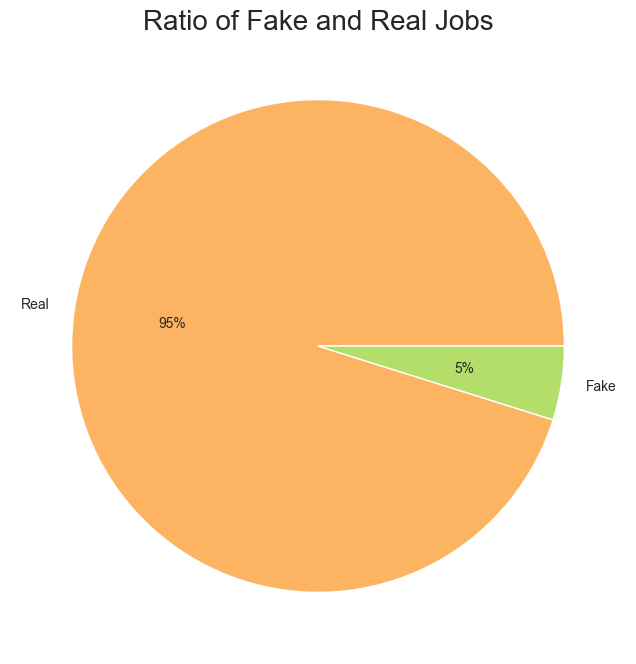

In [87]:
colors = sns.color_palette('Set3')[5:10]
labels=['Real','Fake']
plt.figure(figsize=(10,8))
plt.title('Ratio of Fake and Real Jobs',size=20)
sns.set_style('dark')
plt.pie(df['fraudulent'].value_counts(),labels=labels,colors=colors,autopct='%.0f%%')

In [88]:
#It is an unbalance dataset for classification

In [95]:
fakejobs=cat_col[cat_col['fraudulent']==1]
realjobs=cat_col[cat_col['fraudulent']==0]

In [102]:
fakejobs['country'].fillna('None')

98       US
144        
173      US
180      PK
215      US
         ..
17827    US
17828    AU
17829    PL
17830    US
17831    US
Name: country, Length: 866, dtype: object

Text(0.5, 1.0, 'Real Jobs Functions Ranking')

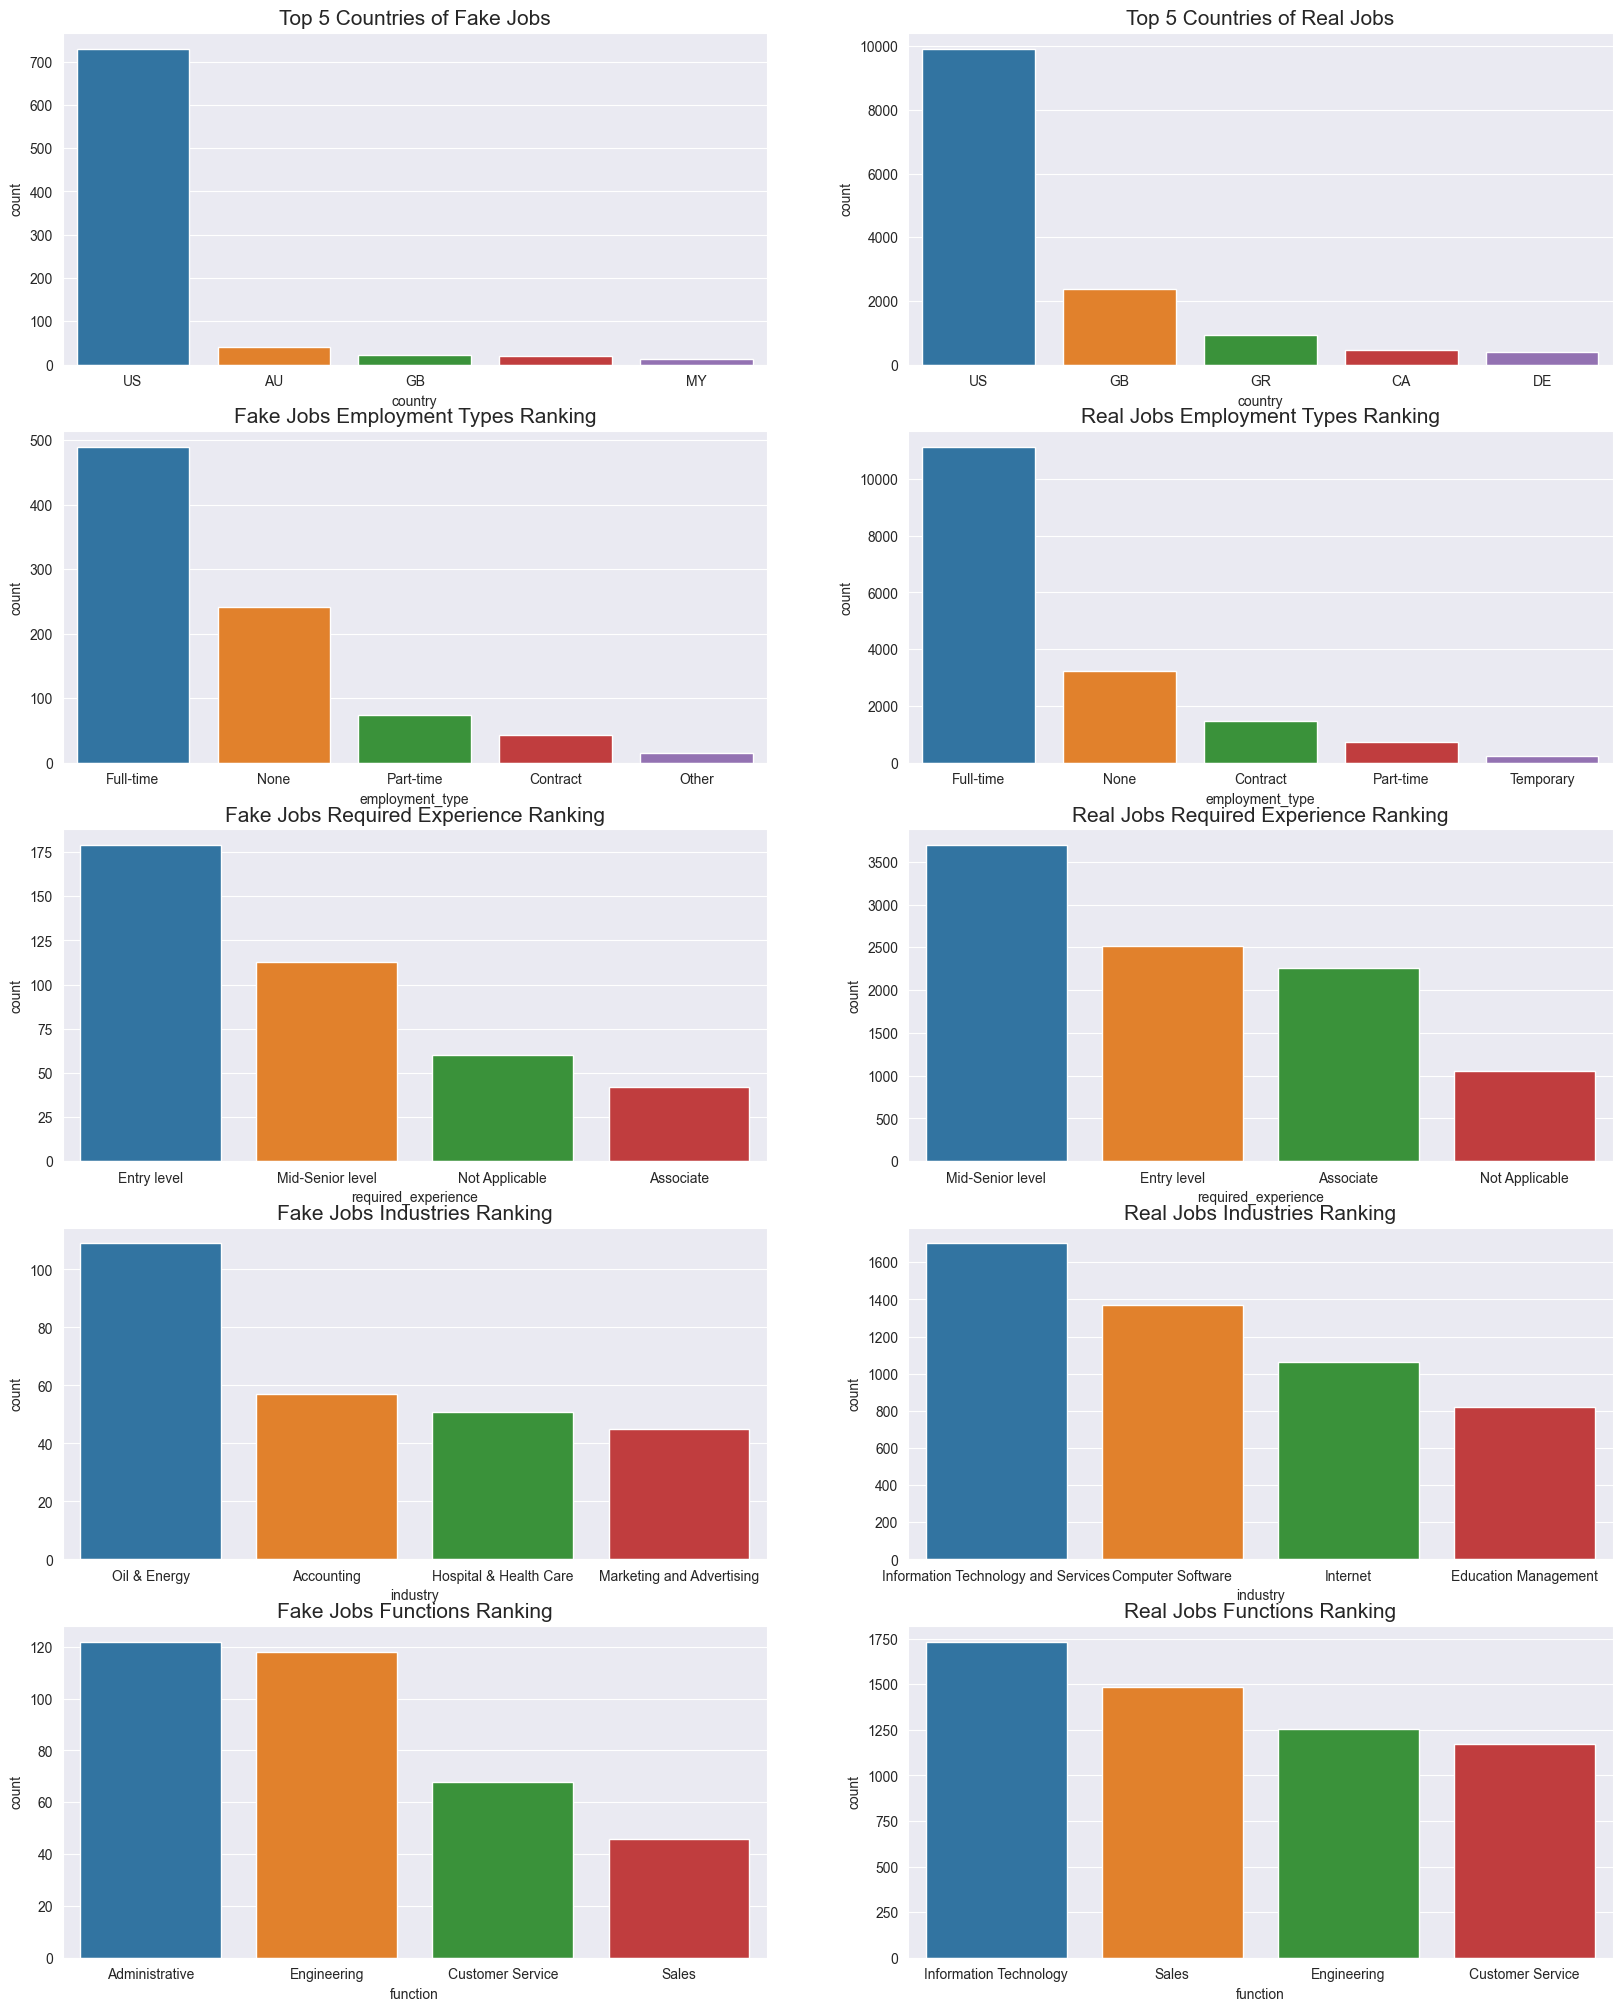

In [157]:
sns.set_style('darkgrid')
fig,axes=plt.subplots(5,2,figsize=(20,25))
sns.countplot(fakejobs, x="country",order=pd.value_counts(fakejobs['country']).iloc[:5].index ,ax=axes[0,0])
sns.countplot(realjobs, x="country",order=pd.value_counts(realjobs['country']).iloc[:5].index ,ax=axes[0,1])
axes[0,0].set_title('Top 5 Countries of Fake Jobs',fontsize=15)
axes[0,1].set_title('Top 5 Countries of Real Jobs',fontsize=15)

sns.countplot(fakejobs, x="employment_type",order=pd.value_counts(fakejobs['employment_type']).iloc[:5].index ,ax=axes[1,0])
sns.countplot(realjobs, x="employment_type",order=pd.value_counts(realjobs['employment_type']).iloc[:5].index ,ax=axes[1,1])
axes[1,0].set_title('Fake Jobs Employment Types Ranking',fontsize=15)
axes[1,1].set_title('Real Jobs Employment Types Ranking',fontsize=15)

sns.countplot(fakejobs, x="required_experience",order=pd.value_counts(fakejobs['required_experience']).iloc[1:5].index ,ax=axes[2,0])
sns.countplot(realjobs, x="required_experience",order=pd.value_counts(realjobs['required_experience']).iloc[1:5].index ,ax=axes[2,1])
axes[2,0].set_title('Fake Jobs Required Experience Ranking',fontsize=15)
axes[2,1].set_title('Real Jobs Required Experience Ranking',fontsize=15)

sns.countplot(fakejobs, x="industry",order=pd.value_counts(fakejobs['industry']).iloc[1:5].index ,ax=axes[3,0])
sns.countplot(realjobs, x="industry",order=pd.value_counts(realjobs['industry']).iloc[1:5].index ,ax=axes[3,1])
axes[3,0].set_title('Fake Jobs Industries Ranking',fontsize=15)
axes[3,1].set_title('Real Jobs Industries Ranking',fontsize=15)

sns.countplot(fakejobs, x="function",order=pd.value_counts(fakejobs['function']).iloc[1:5].index ,ax=axes[4,0])
sns.countplot(realjobs, x="function",order=pd.value_counts(realjobs['function']).iloc[1:5].index ,ax=axes[4,1])
axes[4,0].set_title('Fake Jobs Functions Ranking',fontsize=15)
axes[4,1].set_title('Real Jobs Functions Ranking',fontsize=15)


Text(0.5, 0, '')

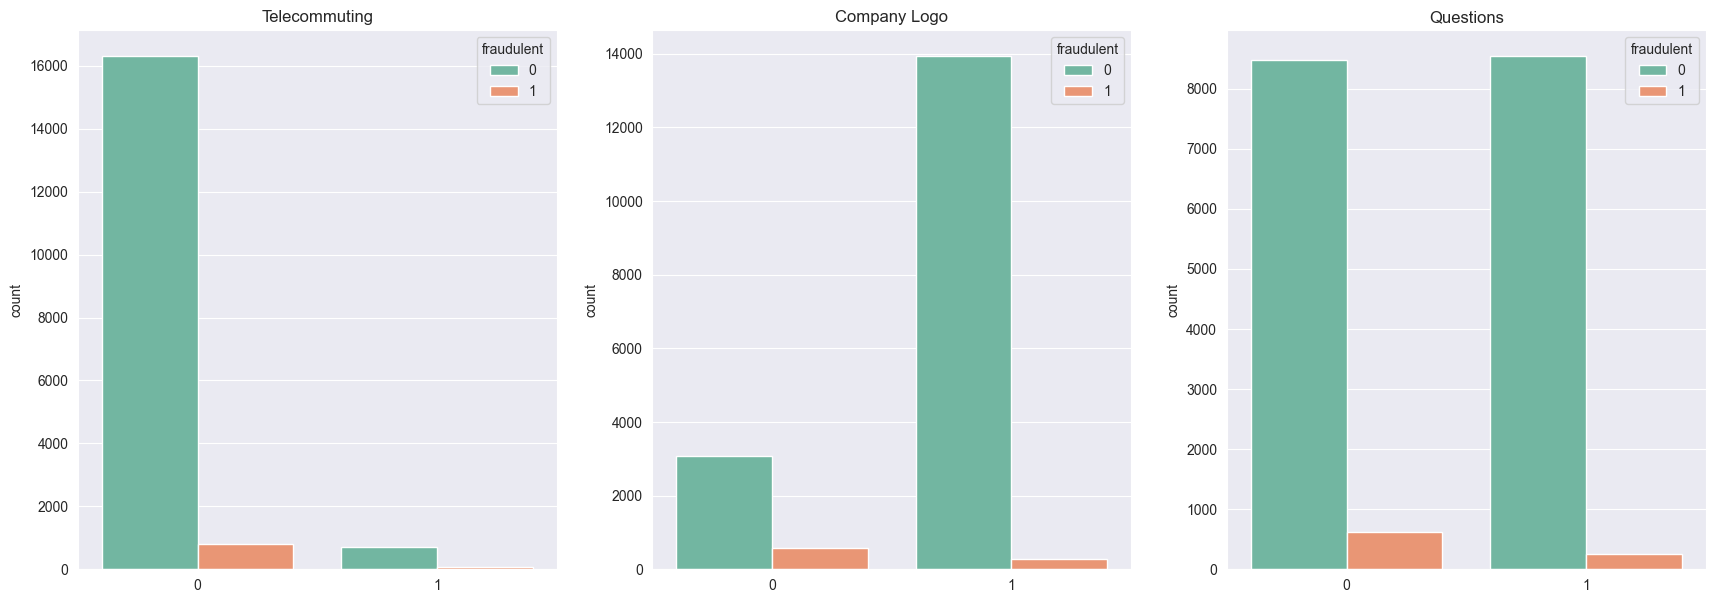

In [159]:
fig,axes=plt.subplots(1,3,figsize=(21,7))
sns.countplot(x='telecommuting', data=cat_col, hue='fraudulent', palette='Set2',ax=axes[0]) 
sns.countplot(x='has_company_logo', data=cat_col, hue='fraudulent', palette='Set2',ax=axes[1]) 
sns.countplot(x='has_questions', data=cat_col, hue='fraudulent', palette='Set2',ax=axes[2]) 

axes[0].set_title('Telecommuting',fontsize=12)
axes[1].set_title('Company Logo',fontsize=12)
axes[2].set_title('Questions',fontsize=12)

axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')

In [ ]:
#The Industries that required experience

In [163]:
experience_list=['Executive','Associate','Director','Mid-Senior level']
experience_df=cat_col.loc[cat_col['required_experience'].isin(experience_list)]

In [164]:
experience_industry_df=experience_df.groupby('industry')['required_experience'].value_counts(ascending=False).to_frame()
experience_industry_df.head(30)

required_experience
industry                required_experience                     
Accounting              Associate                             25
                        Mid-Senior level                      14
                        Director                               1
                        Executive                              1
Airlines/Aviation       Mid-Senior level                      23
                        Associate                             10
                        Executive                              3
                        Director                               1
Animation               Associate                              1
Apparel & Fashion       Mid-Senior level                      36
                        Associate                              9
                        Director                               6
Architecture & Planning Mid-Senior level                       3
                        Associate                              2
Automotive              Mid-Senior level                      32
                        Associate                             21
                        Director                               1
                        Executive                              1
Aviation & Aerospace    Mid-Senior level                       8
                        Associate                              5
                        Director                               5
Banking                 Associate                             32
                        Mid-Senior level                      29
                        Director                               2
                        Executive                              1
Biotechnology           Associate                             14
                        Mid-Senior level                      11
                        Director                               1
Broadcast Media         Mid-Senior level                      43
                        Associate                              4

In [ ]:
#The functions that required experience

In [165]:
experience_function_df=experience_df.groupby('function')['required_experience'].value_counts(ascending=False).to_frame()
experience_function_df.head(30)

required_experience
function              required_experience                     
Account Management    Mid-Senior level                       1
Accounting/Auditing   Associate                             58
                      Mid-Senior level                      54
                      Director                               5
                      Executive                              3
Ad Sales              Director                               1
Administrative        Associate                            109
                      Mid-Senior level                      32
                      Executive                              6
                      Director                               3
Advertising           Mid-Senior level                      30
                      Associate                             17
                      Director                               4
All                   Mid-Senior level                       1
Apps                  Executive                              1
Art Studio            Associate                              1
Art/Creative          Mid-Senior level                      40
                      Associate                             23
                      Director                               5
Broadcasting          Associate                              1
Business              Mid-Senior level                       1
Business Analyst      Mid-Senior level                      26
                      Associate                             24
                      Director                               3
Business Development  Mid-Senior level                      59
                      Associate                             55
                      Director                              15
                      Executive                              6
Business Developmment Associate                              1
CSD Technology        Mid-Senior level                       1

In [166]:
#Countries that having typical employment types

In [169]:
cat_col.groupby('country')['employment_type'].value_counts(ascending=False).to_frame().head(20)

employment_type
country employment_type                 
        None                         214
        Full-time                     96
        Part-time                     14
        Contract                      12
        Other                          8
        Temporary                      2
AE      Full-time                     34
        None                          20
AL      None                           1
AM      Full-time                      2
AR      None                           5
        Full-time                      4
AT      None                           7
        Full-time                      6
        Contract                       1
AU      Full-time                    136
        Part-time                     37
        None                          28
        Contract                       6
        Other                          4

In [170]:
# industry that required specific education

In [171]:
cat_col.groupby('industry')['required_education'].value_counts(ascending=False).to_frame().head(20)

required_education
industry                       required_education                                   
Accounting                     None                                               71
                               Bachelor's Degree                                  35
                               High School or equivalent                          29
                               Unspecified                                        15
                               Certification                                       4
                               Master's Degree                                     2
                               Professional                                        2
                               Some College Coursework Completed                   1
Airlines/Aviation              None                                               33
                               Bachelor's Degree                                  22
                               Unspecified                                         4
                               High School or equivalent                           3
                               Master's Degree                                     1
Alternative Dispute Resolution Vocational                                          1
Animation                      None                                                3
                               Certification                                       1
                               Unspecified                                         1
Apparel & Fashion              None                                               44
                               Bachelor's Degree                                  34
                               Unspecified                                         9